# Задание 2
1. Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
2. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
3. Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
4. Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
5. Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [5]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [6]:
boston = load_boston()

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
data = boston.data
target = boston.target
feat = boston.feature_names

In [12]:
X = pd.DataFrame(data, columns = feat)

In [14]:
y = pd.DataFrame(target, columns = ['price'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
model = RandomForestRegressor(max_depth = 12, n_estimators = 1000, random_state = 42)

In [21]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [25]:
r2_score(y_pred, y_test)

0.8479049999699443

### В данном случае Random Forest работает лучше Linear Regression, т.к. r2 у первой модели больше ( 0.847 vs 0.711)

# *Задание 3
1. Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.
2. С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.


In [27]:
RandomForestRegressor?

In [43]:
ar = model.feature_importances_
ar

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [49]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Random Forest Feature Importance')

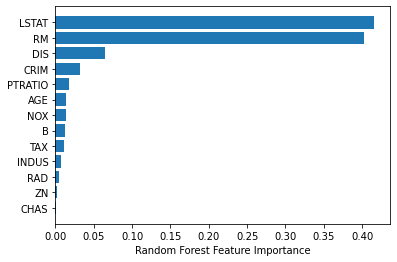

In [52]:
sorted_idx = ar.argsort()
plt.barh(feat[sorted_idx], ar[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Ответ: Наибольший вес имеют LSTAT и RM